In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.close('all')
from  matplotlib import pyplot
import seaborn as sns
sns.set(style='ticks')

In [3]:
df = pd.read_csv("data.csv")
df.head(4)
df = df[df["trust"].isin(["No sabe", "No", "Sí"])]

# Resultados encuesta

[Text(0, 0.5, 'Edad'), Text(0.5, 0, 'Cantidad')]

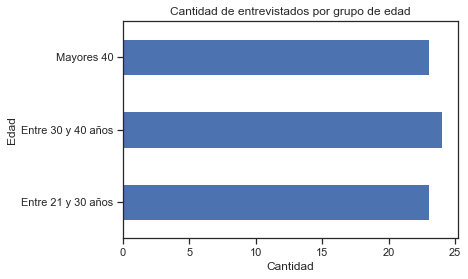

In [4]:
ages_group = df.groupby("age")
ages = ages_group["age"].count()
plot = ages.plot.barh(title="Cantidad de entrevistados por grupo de edad")
plot.set(ylabel="Edad", xlabel="Cantidad")

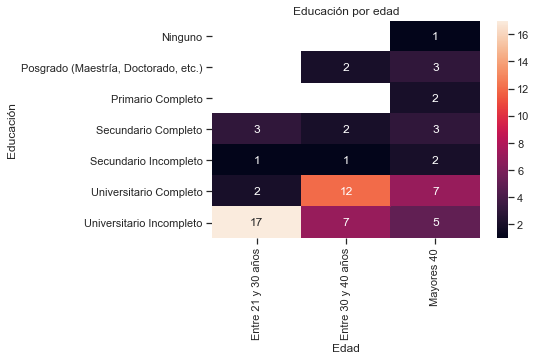

In [4]:
education_age = df.groupby(["education", "age"]).size()
education_age = education_age.reset_index(level=[0,1])
education_age.columns = ["Educación", "Edad", "size"]
result = education_age.pivot(index='Educación', columns='Edad', values='size')
sns.heatmap(result, annot=True, fmt="g").set_title("Educación por edad")
plt.show()

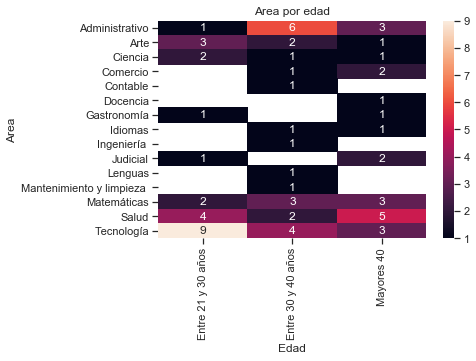

In [5]:
area_age = df.groupby(["area", "age"]).size()
area_age = area_age.reset_index(level=[0,1])
area_age.columns = ["Area", "Edad", "size"]
result = area_age.pivot(index='Area', columns='Edad', values='size')
sns.heatmap(result, annot=True, fmt="g").set_title("Area por edad")
plt.show()

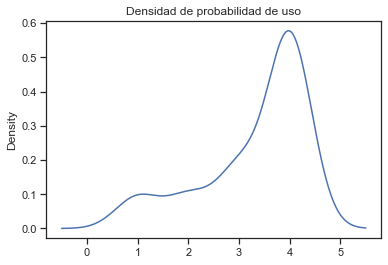

In [6]:
df["app_use"].plot.density(title="Densidad de probabilidad de uso")

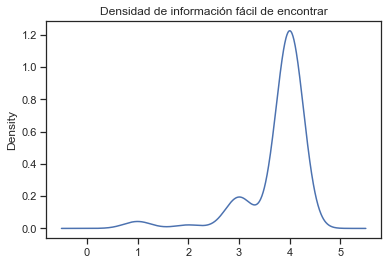

In [7]:
df["easy_information"].plot.density(title="Densidad de información fácil de encontrar")

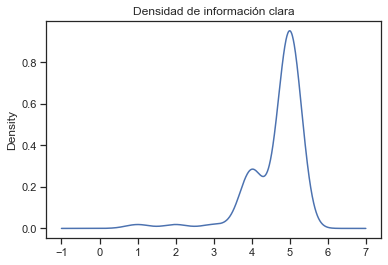

In [8]:
df["comprehensible"].plot.density(title="Densidad de información clara")

[Text(0, 0.5, 'Densidad')]

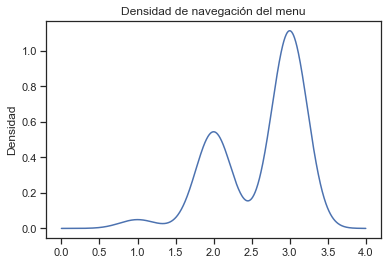

In [7]:
plot = df["navigation"].plot.density(title="Densidad de navegación del menu")
plot.set(ylabel="Densidad")

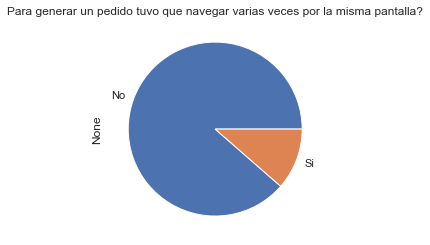

In [10]:
df.groupby("order_navigation").size().plot.pie(title="Para generar un pedido tuvo que navegar varias veces por la misma pantalla?")

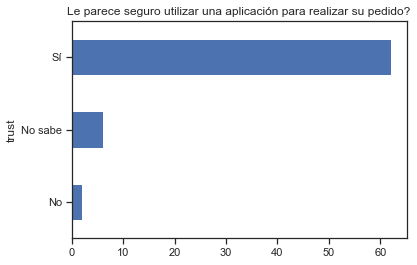

In [11]:
df.groupby("trust").size().plot.barh(title="Le parece seguro utilizar una aplicación para realizar su pedido?")

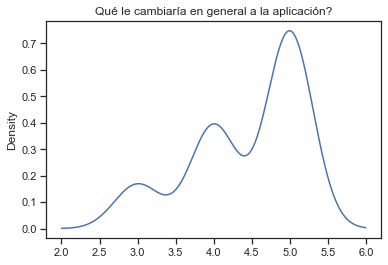

In [89]:
df["custom"].plot.density(title="Qué le cambiaría en general a la aplicación?")

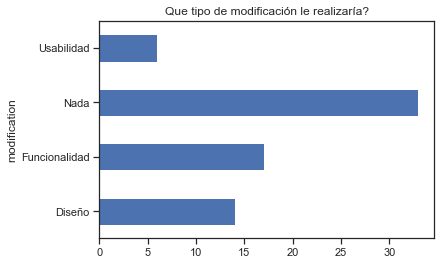

In [97]:
df.groupby("modification").size().plot.barh(title="Que tipo de modificación le realizaría?")

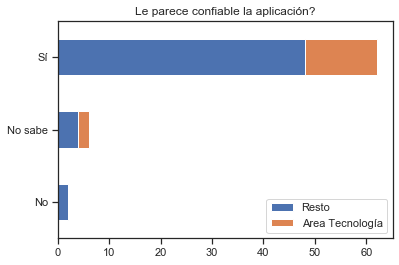

In [6]:
col1 = df[df["area"] != "Tecnología"].groupby("trust").size()
col2 = df[df["area"] == "Tecnología"].groupby("trust").size()
pd.DataFrame({
    "Resto": col1, "Area Tecnología": col2
}).plot.barh(stacked=True, title="Le parece confiable la aplicación?")

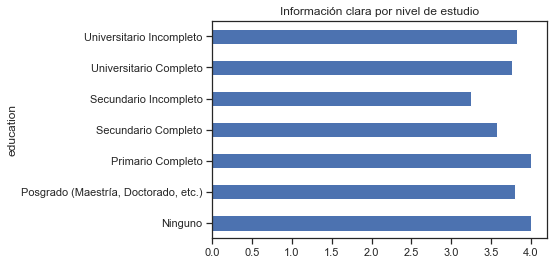

In [103]:
df.groupby(["education"])["easy_information"].describe()["mean"].plot.barh(title="Información clara por nivel de estudio")

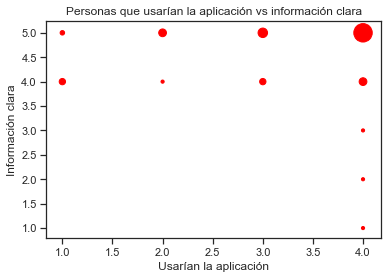

In [105]:
app_use = df.groupby(["app_use","comprehensible"]).size()
app_use = app_use.reset_index(level=[0,1])
app_use.columns = ["Usarían la aplicación", "Información clara", "size"]
app_use.plot.scatter(x="Usarían la aplicación", y="Información clara", color="red", s=app_use["size"] * 10, title="Personas que usarían la aplicación vs información clara")

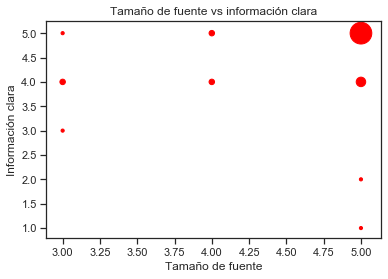

In [106]:
font = df.groupby(["font","comprehensible"]).size()
font = font.reset_index(level=[0,1])
font.columns = ["Tamaño de fuente", "Información clara", "size"]
font.plot.scatter(x="Tamaño de fuente", y="Información clara", color="red", s=font["size"] * 10, title="Tamaño de fuente vs información clara")

# Resultados entrevista

In [9]:
df = pd.read_csv("interviews.csv")
df["use_delivery2"] = df.apply(lambda row: (False,True)[row.use_delivery == "si"], axis=1)
df["winner"] = df.apply(lambda row: ("app","paper")[row.paper_time > row.app_time], axis=1)
df

,age,profession,order,paper_time,app_time,frecuency,use_delivery,use_restaurant,worst_moment,time,...,intuition,would_use,recommend,easy,remove_paper,doubts,benefits,waiter,use_delivery2,winner
0,27,Sistemas,CA,40,60,Dos veces por mes,si,no,Pagar,10,...,5,si,5,No sabe,no,si,Menos costo,no,True,app
1,45,Sistemas,AC,95,150,Dos veces por mes,no,no,Esperar el pedido,10,...,4,si,4,Aplicación,no,si,Rapidez,no,False,app
2,55,Comerciante,CA,133,80,Una por mes,si,no,Esperar el pedido,10,...,5,no,1,Aplicación,no,no,Ninguno,si,True,paper
3,50,Comerciante,AC,60,80,Una por mes,no,no,Esperar el pedido,5,...,4,no,4,No sabe,no,si,Rapidez,si,False,app
4,25,Deporte,AC,55,70,Más de 4 veces,si,si,Esperar el pedido,10,...,5,si,5,Carta,no,no,Rapidez,no,True,app
5,55,Arquitectura,AC,80,157,Más de 4 veces,no,si,Esperar el pedido,0,...,3,si,3,Aplicación,si,si,Rapidez,no,False,app
6,46,Docencia,CA,120,80,Dos veces por mes,no,no,Salir de casa,0,...,3,no,3,Carta,no,si,Rapidez,si,False,paper
7,27,Industria,CA,120,60,Una por mes,si,no,Esperar el pedido,15,...,5,si,4,Carta,no,no,Ninguno,no,True,paper
8,25,Docencia,CA,180,120,Más de 4 veces,si,no,Esperar el pedido,10,...,5,si,5,Aplicación,no,no,Ninguno,no,True,paper
9,30,Industria,AC,65,52,Dos veces por mes,si,no,Pagar,15,...,4,si,5,Carta,si,no,Rapidez,no,True,paper


[Text(0, 0.5, 'Profesión'), Text(0.5, 0, 'Cantidad')]

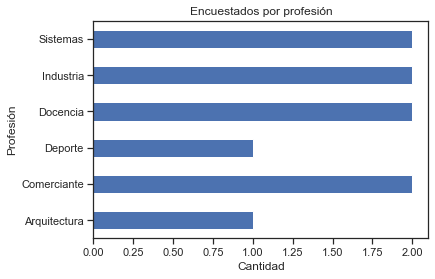

In [7]:
plot = df.groupby("profession").size().plot.barh(title="Encuestados por profesión")
plot.set(xlabel="Cantidad", ylabel="Profesión")

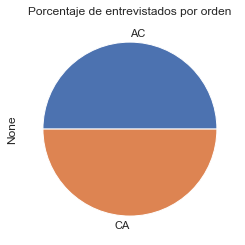

In [15]:
df.groupby("order").size().plot.pie(title="Porcentaje de entrevistados por orden")

[Text(0, 0.5, 'Tiempo papel'), Text(0.5, 0, 'Tiempo app')]

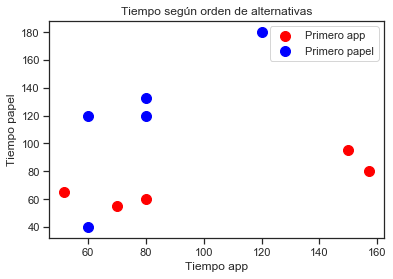

In [10]:
app = df[df["order"] == "AC"]
paper = df[df["order"] == "CA"]
ax = app.plot.scatter(x="app_time", y="paper_time", color="red", label="Primero app", s=100)
plot = paper.plot.scatter(x="app_time", y="paper_time", color="blue", label="Primero papel", s=100, ax=ax, title="Tiempo según orden de alternativas")
plot.set(xlabel="Tiempo app", ylabel="Tiempo papel")

[Text(0, 0.5, 'Tiempo papel'), Text(0.5, 0, 'Tiempo app')]

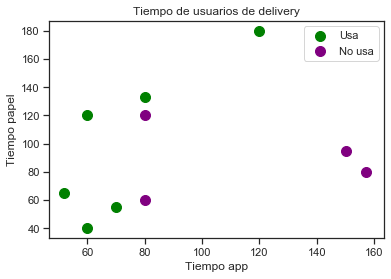

In [11]:
use = df[df["use_delivery2"] == True]
no_use = df[df["use_delivery2"] == False]
ax = use.plot.scatter(x="app_time", y="paper_time", color="green", label="Usa", s=100)
plot = no_use.plot.scatter(x="app_time", y="paper_time", color="purple", label="No usa", s=100, ax=ax, title="Tiempo de usuarios de delivery")
plot.set(xlabel="Tiempo app", ylabel="Tiempo papel")

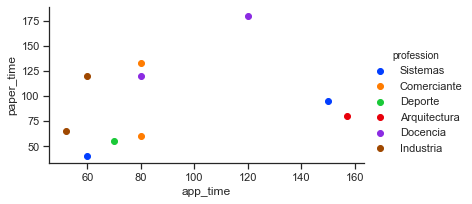

In [7]:
fg = sns.FacetGrid(data=df, hue='profession', palette="bright", aspect=1.8)
fg.map(pyplot.scatter, 'app_time', 'paper_time').add_legend()

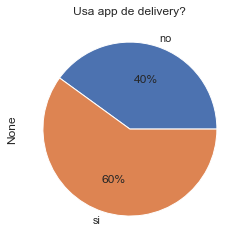

In [114]:
df.groupby("use_delivery").size().plot.pie(autopct='%d%%', title="Usa app de delivery?")

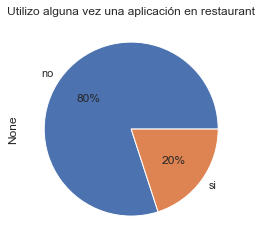

In [115]:
df.groupby("use_restaurant").size().plot.pie(autopct='%d%%', title="Utilizo alguna vez una aplicación en restaurant")

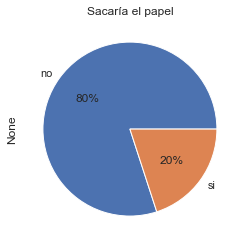

In [116]:
df.groupby("remove_paper").size().plot.pie(autopct='%d%%', title="Sacaría el papel")

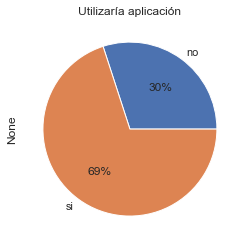

In [117]:
df.groupby("would_use").size().plot.pie(autopct='%d%%', title="Utilizaría aplicación")

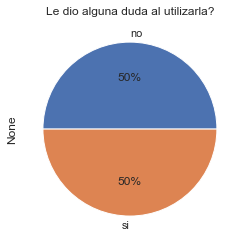

In [118]:
df.groupby("doubts").size().plot.pie(autopct='%d%%', title="Le dio alguna duda al utilizarla?")

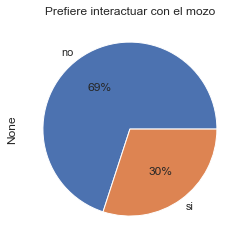

In [17]:
df.groupby("waiter").size().plot.barh(autopct='%d%%', title="Prefiere interactuar con el mozo")

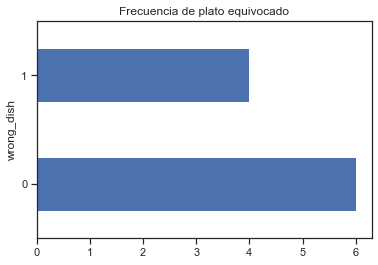

In [120]:
df.groupby("wrong_dish").size().plot.barh(title="Frecuencia de plato equivocado")

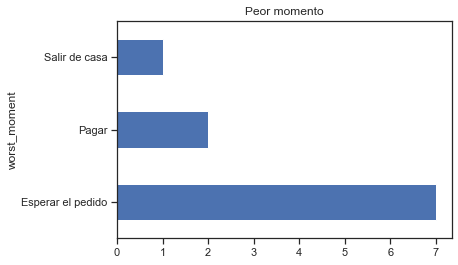

In [121]:
df.groupby("worst_moment").size().plot.barh(title="Peor momento")

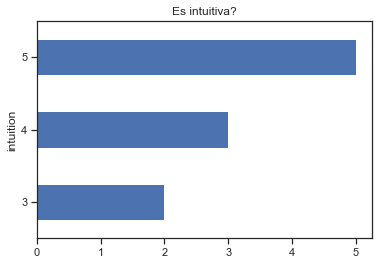

In [124]:
df.groupby("intuition").size().plot.barh(title="Es intuitiva?")

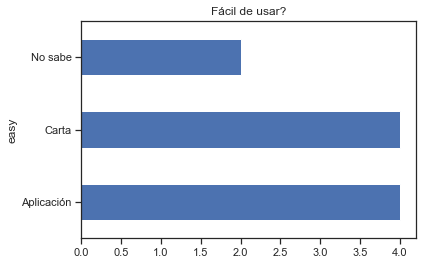

In [125]:
df.groupby("easy").size().plot.barh(title="Fácil de usar?")

[Text(0, 0.5, 'Beneficios'), Text(0.5, 0, 'Cantidad de personas')]

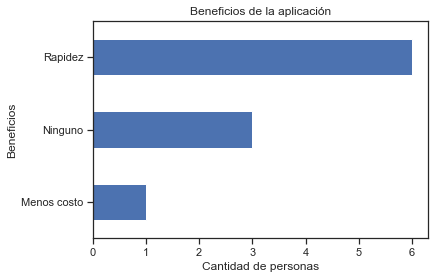

In [15]:
plot = df.groupby("benefits").size().plot.barh(title="Beneficios de la aplicación")
plot.set(xlabel="Cantidad de personas", ylabel="Beneficios")

[Text(0, 0.5, 'Delivery, Mozo'), Text(0.5, 0, 'Cantidad')]

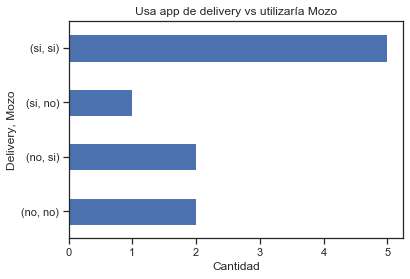

In [18]:
plot = df.groupby(["use_delivery","would_use"]).size().plot.barh(title="Usa app de delivery vs utilizaría Mozo")
plot.set(xlabel="Cantidad", ylabel="Delivery, Mozo")

[Text(0, 0.5, 'Restaurant, Mozo'), Text(0.5, 0, 'Cantidad')]

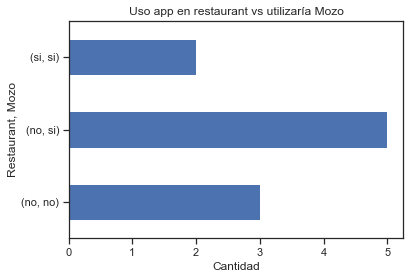

In [19]:
plot = df.groupby(["use_restaurant","would_use"]).size().plot.barh(title="Uso app en restaurant vs utilizaría Mozo")
plot.set(xlabel="Cantidad", ylabel="Restaurant, Mozo")